# 📩 **Email spam classification using NLP**

## 📂 **Creating the dataframe**

In [97]:
import os
import pandas as pd

# Path to the dataset folder
dataset_folder = 'dataset'

# Initialize an empty list to store the data
data = []

# Iterate through each subdirectory (spam, hard_ham, easy_ham)
for folder_name in os.listdir(dataset_folder):
    folder_path = os.path.join(dataset_folder, folder_name)
    
    # Determine the label based on the folder name
    if folder_name == 'spam':
        label = 'SPAM'
    else:
        label = 'HAM'
    
    # Iterate through each file in the subdirectory
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Read the content of the file
        with open(file_path, 'r', encoding='latin-1') as file:
            content = file.read()
        
        # Append the label and content to the data list
        data.append({'Label': label, 'Content': content})


# Create a DataFrame from the collected data
df_unshuffled = pd.DataFrame(data)
# Display the rows
print("Dataframe:\n\n",df_unshuffled)

df = df_unshuffled.sample(frac=1).reset_index(drop=True)

print("\nSchuffled Dataframe :\n\n",df)

Dataframe:

      Label                                            Content
0      HAM  From exmh-workers-admin@redhat.com  Thu Aug 22...
1      HAM  From Steve_Burt@cursor-system.com  Thu Aug 22 ...
2      HAM  From timc@2ubh.com  Thu Aug 22 13:52:59 2002\n...
3      HAM  From irregulars-admin@tb.tf  Thu Aug 22 14:23:...
4      HAM  From exmh-users-admin@redhat.com  Thu Aug 22 1...
...    ...                                                ...
4193  SPAM  From tba@insiq.us  Wed Dec  4 11:46:34 2002\nR...
4194  SPAM  Return-Path: <raye@yahoo.lv>\nReceived: from u...
4195  SPAM  From cweqx@dialix.oz.au  Tue Aug  6 11:03:54 2...
4196  SPAM  From ilug-admin@linux.ie  Wed Dec  4 11:52:36 ...
4197  SPAM  mv 00001.317e78fa8ee2f54cd4890fdc09ba8176 0000...

[4198 rows x 2 columns]

Schuffled Dataframe :

      Label                                            Content
0      HAM  From rpm-list-admin@freshrpms.net  Wed Aug 28 ...
1      HAM  From sentto-2242572-56020-1034080299-zzzz=exam...
2     S

## 🧹**Data cleaning** 

In [98]:
import pandas as pd 
import email 
from email import policy
from email.parser import BytesParser
import re

# Regex patterns to extract metadata
metadata_patterns = {
    'From': r"^From: (.*)$",
    'To': r"^To: (.*)$",
    'Subject': r"^Subject: (.*)$",
    'Date': r"^Date: (.*)$",
    
}

def parse_email(raw_email):
    # Parse email metadata
    metadata = {}
    for key, pattern in metadata_patterns.items():
        match = re.search(pattern, raw_email, re.MULTILINE)
        if match:
            metadata[key] = match.group(1)

    # Extract email body
    email_body_start = raw_email.find('\n\n') + 2
    body = raw_email[email_body_start:]

    return metadata, body


# Replace 'Content' with the appropriate column name if it's different

# Apply the parse_email function to each row in the DataFrame
parsed_data = df['Content'].apply(parse_email)

# Create a new DataFrame from the parsed email data
parsed_df = pd.DataFrame(parsed_data.tolist(), columns=['Metadata', 'Body'])
parsed_df.head()

,Metadata,Body
0,"{'From': '"""" Angles "" Puglisi"" <angles@aminves...",Matthias Saou (matthias@rpmforge.net) wrote*:\...
1,"{'From': '""Tim Chapman"" <timc@2ubh.com>', 'To'...",Ananova: \nNewspaper's readers complain over ...
2,"{'From': 'Lisa Smiley <slisa@compuserve.com>',...",<html>\n<head>\n<title>New amazing incest show...
3,"{'From': '""DivX News"" <divx.at.lists.divx.com@...","DivX News (Number 21, 2002-07-26)\n===========..."
4,"{'From': '"""" <County-Origin.?@dogma.slashnull....",------=_NextPart_000_0066_62CFF34B.9C652FBA\nC...


In [99]:
# Remove the date from the body
parsed_df['Body'] = parsed_df['Body'].apply(lambda x: re.sub(r"^Date: .*", "", x, flags=re.MULTILINE))

parsed_df.head()

,Metadata,Body
0,"{'From': '"""" Angles "" Puglisi"" <angles@aminves...",Matthias Saou (matthias@rpmforge.net) wrote*:\...
1,"{'From': '""Tim Chapman"" <timc@2ubh.com>', 'To'...",Ananova: \nNewspaper's readers complain over ...
2,"{'From': 'Lisa Smiley <slisa@compuserve.com>',...",<html>\n<head>\n<title>New amazing incest show...
3,"{'From': '""DivX News"" <divx.at.lists.divx.com@...","DivX News (Number 21, 2002-07-26)\n===========..."
4,"{'From': '"""" <County-Origin.?@dogma.slashnull....",------=_NextPart_000_0066_62CFF34B.9C652FBA\nC...


In [100]:

def remove_special_characters(text):
    # Define a regular expression pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # Matches any character that is not a letter, digit, or whitespace

    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text


def parse_email_body(body):
    # Remove HTML tags
    body = re.sub(r'<[^>]+>', '', body)
    body = re.sub(r'nbsp', '',body)
    
    # Remove URLs
    body = re.sub(r'http\S+', '', body)
    
    # Remove special characters and escape sequences
    body = remove_special_characters(body)
    
    return body.strip()

# Apply the parse_email_body function to the 'Body' column of parsed_df
parsed_df['Body'] = parsed_df['Body'].apply(parse_email_body)
parsed_df.head()

,Metadata,Body
0,"{'From': '"""" Angles "" Puglisi"" <angles@aminves...",Matthias Saou matthiasrpmforgenet wrote\n\nYou...
1,"{'From': '""Tim Chapman"" <timc@2ubh.com>', 'To'...",Ananova \nNewspapers readers complain over le...
2,"{'From': 'Lisa Smiley <slisa@compuserve.com>',...",New amazing incest show on HotBabiesLiveCom\n\...
3,"{'From': '""DivX News"" <divx.at.lists.divx.com@...",DivX News Number 21 20020726\n\nWhats Hot in t...
4,"{'From': '"""" <County-Origin.?@dogma.slashnull....",NextPart000006662CFF34B9C652FBA\nContentType t...


In [101]:
# Define a function to extract the main body of the email

def extract_main_body(body):
    # Split the body by lines
    lines = body.split('\n')
    main_body_lines = []
    for line in lines:
        if not re.match(r'^[-]+\s*$', line) and not re.match(r'^------------------', line) and not re.match(r'^\s*Yahoo! Groups Sponsor', line) and not re.match(r'^Your use of Yahoo! Groups is subject to', line):
            main_body_lines.append(line)
    # Join the remaining lines to form the main body
    main_body = '\n'.join(main_body_lines)
    return main_body.strip()

# Apply the extract_main_body function to the 'Body' column of parsed_df
parsed_df['Body'] = parsed_df['Body'].apply(extract_main_body)


parsed_df.head()

,Metadata,Body
0,"{'From': '"""" Angles "" Puglisi"" <angles@aminves...",Matthias Saou matthiasrpmforgenet wrote\n\nYou...
1,"{'From': '""Tim Chapman"" <timc@2ubh.com>', 'To'...",Ananova \nNewspapers readers complain over le...
2,"{'From': 'Lisa Smiley <slisa@compuserve.com>',...",New amazing incest show on HotBabiesLiveCom\n\...
3,"{'From': '""DivX News"" <divx.at.lists.divx.com@...",DivX News Number 21 20020726\n\nWhats Hot in t...
4,"{'From': '"""" <County-Origin.?@dogma.slashnull....",NextPart000006662CFF34B9C652FBA\nContentType t...


In [102]:
# Concatenate the two DataFrames along the columns axis
merged_df = pd.concat([df, parsed_df], axis=1)
merged_df.head()

,Label,Content,Metadata,Body
0,HAM,From rpm-list-admin@freshrpms.net Wed Aug 28 ...,"{'From': '"""" Angles "" Puglisi"" <angles@aminves...",Matthias Saou matthiasrpmforgenet wrote\n\nYou...
1,HAM,From sentto-2242572-56020-1034080299-zzzz=exam...,"{'From': '""Tim Chapman"" <timc@2ubh.com>', 'To'...",Ananova \nNewspapers readers complain over le...
2,SPAM,From slisa@compuserve.com Mon Jun 24 17:49:49...,"{'From': 'Lisa Smiley <slisa@compuserve.com>',...",New amazing incest show on HotBabiesLiveCom\n\...
3,HAM,Return-Path: <DivX-bounce@krieger.mailshell.co...,"{'From': '""DivX News"" <divx.at.lists.divx.com@...",DivX News Number 21 20020726\n\nWhats Hot in t...
4,SPAM,From County-Origin.?@dogma.slashnull.org Mon ...,"{'From': '"""" <County-Origin.?@dogma.slashnull....",NextPart000006662CFF34B9C652FBA\nContentType t...


In [103]:
# Drop the 'Metadata' and 'Content' columns from the DataFrame
merged_df = merged_df.drop(columns=['Metadata', 'Content'])
merged_df.head()

,Label,Body
0,HAM,Matthias Saou matthiasrpmforgenet wrote\n\nYou...
1,HAM,Ananova \nNewspapers readers complain over le...
2,SPAM,New amazing incest show on HotBabiesLiveCom\n\...
3,HAM,DivX News Number 21 20020726\n\nWhats Hot in t...
4,SPAM,NextPart000006662CFF34B9C652FBA\nContentType t...


In [104]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4198 non-null   object
 1   Body    4198 non-null   object
dtypes: object(2)
memory usage: 65.7+ KB


## 📊 **Data Visualization**

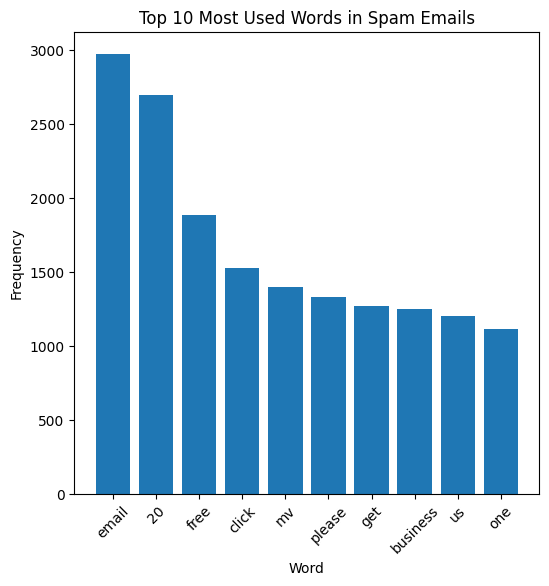

In [105]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


# Filter the DataFrame to include only spam emails
spam_df = merged_df[merged_df['Label'] == 'SPAM']

# Tokenize the text in the 'Body' column
tokens = []
for text in spam_df['Body']:
    tokens.extend(word_tokenize(text.lower()))  # Convert to lowercase



# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_tokens)

# Get most common words and their frequencies
top_words = word_counts.most_common(10)  

words, frequencies = zip(*top_words)

# Plot the most common words
plt.figure(figsize=(6, 6))
plt.bar(words, frequencies)
plt.title('Top 10 Most Used Words in Spam Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Notes :
- mv is short for Market Value

## 🔎 **Data Processing**

In [106]:
# Encoding the Label feature 
merged_df.loc[merged_df['Label'] == 'SPAM', 'Label'] = 0
merged_df.loc[merged_df['Label'] == 'HAM', 'Label'] = 1
merged_df.head()

,Label,Body
0,1,Matthias Saou matthiasrpmforgenet wrote\n\nYou...
1,1,Ananova \nNewspapers readers complain over le...
2,0,New amazing incest show on HotBabiesLiveCom\n\...
3,1,DivX News Number 21 20020726\n\nWhats Hot in t...
4,0,NextPart000006662CFF34B9C652FBA\nContentType t...


### Spliting the data into training and testing data

In [107]:
x = merged_df['Body']
y = merged_df['Label']

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Transform the text data to feature vectors that can be used as input

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
# Fit the vectorizer on the training data and transform both training and testing data
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [110]:
# convert y_train and y_test values into integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [111]:
print(x_train)

964     GAB I thought this nekkid URL was going to be ...
239     When Americas top companies compete for your b...
2387    On Tue 27 Aug 2002 Rohit Khare wrote\n\n DATAP...
990     Mr FoRK\nOf the three lying politicians which ...
108     Good idea\n\nThis could also be a job for P2P ...
                              ...                        
3444    To unsubscribe simply reply to this email mess...
466     Via Robot Wisdom   Maybe you UC folk know thes...
3092    Anthony Baxter\n Well Ive finally got around t...
3772    Mike Bostock said\n\n Received from tracking2 ...
860     How would you like a Top Rated Law Firm workin...
Name: Body, Length: 3358, dtype: object


In [112]:
print(x_train_features)

  (0, 36090)	0.022127709486481833
  (0, 12945)	0.022127709486481833
  (0, 46601)	0.016169711237607923
  (0, 12583)	0.011034798514737052
  (0, 34566)	0.015486404085985197
  (0, 17584)	0.01817894722899061
  (0, 1589)	0.02059698917209583
  (0, 33315)	0.008168845371902345
  (0, 34528)	0.017611598728470713
  (0, 41145)	0.01756795407114643
  (0, 35150)	0.020795730890334534
  (0, 20179)	0.030280239366315548
  (0, 47123)	0.023118192517840957
  (0, 51289)	0.019892585989492333
  (0, 3675)	0.03181095968070155
  (0, 3131)	0.015486404085985197
  (0, 5431)	0.030280239366315548
  (0, 14766)	0.018498170040023333
  (0, 16687)	0.02613273539058562
  (0, 46851)	0.016051725984965164
  (0, 28180)	0.024464719189067768
  (0, 22750)	0.023311836030292982
  (0, 31544)	0.026577392358013704
  (0, 15213)	0.016751664092167856
  (0, 15773)	0.018970688542111033
  :	:
  (3357, 24508)	0.1166931566403611
  (3357, 10465)	0.14440708055492735
  (3357, 12406)	0.13109931855096824
  (3357, 42942)	0.08807065723212949
  (3357, 5

## 🤖 **Model training**

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
mailModel = LogisticRegression()

In [115]:
mailModel.fit(x_train_features, y_train)

LogisticRegression()

## 📍 **Evaluationg the model's accuracy**

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
prediction_training_data = mailModel.predict(x_train_features)
accuracy_training_data = accuracy_score(y_train, prediction_training_data)
print(accuracy_training_data)

0.9746873138773079


In [118]:
prediction_test_data = mailModel.predict(x_test_features)
accuracy_training_data = accuracy_score(y_test, prediction_test_data)
print(accuracy_training_data)

0.9714285714285714


## ✅ **Model Testing**

In [119]:
y_pred = mailModel.predict(x_test_features)

# Number of rows to print
num_rows = 10

# Combine predicted and actual values for comparison
results = zip(y_pred[:num_rows], y_test[:num_rows])

# Print predicted and actual values
print("------ Values ------")
print("Predicted | Actual")
for pred, actual in results:
    print(f"{pred}         | {actual}")

------ Values ------
Predicted | Actual
1         | 1
0         | 0
1         | 1
0         | 0
0         | 0
0         | 0
0         | 0
1         | 1
1         | 1
1         | 1


In [120]:
# Enter an email you wanna test !
input_your_email = ["You won a free car !!  Click the link : http.freecars.com "]
input_data_features = feature_extraction.transform(input_your_email)
prediction = mailModel.predict(input_data_features)
print("Result :")
if(prediction==1):
    print('Ham mail')
else:
    print('Spam mail')

Result :
Spam mail
